# Google BigQuery en Python

https://pypi.org/project/google-cloud-bigquery/



In [1]:
# instalar bigquery 
!pip install google-cloud-bigquery

In [2]:
# cargamos las librerías
from google.cloud import bigquery
from google.oauth2 import service_account

In [ ]:
# Si trabajamos con Token y secret del service account
#creds = service_account.Credentials.from_service_account_file('PATH DEL FICHERO JSON en .key')

In [3]:
creds = service_account.Credentials.from_service_account_file('/content/thebridgept0521-00ccc9a47591.json')

> previamente debemos crear el directorio en nuestro root /home/<user>/.key con el comando **mkdir**.

In [4]:
# Alternativa con Google Oauth de Google Colab
from google.colab import auth
auth.authenticate_user()

## Jerarquía estructura BigQuery

- ProjectID
- DatasetID o Dataset
- Table



In [5]:
# introducimos el projectID
proj_id = 'thebridgept0521'

In [6]:
# En caso de trabajar con el token
client = bigquery.Client(project=proj_id)

In [7]:
# Probamos Gcp-BQ
query = (
'SELECT name '
'FROM `bigquery-public-data.usa_names.usa_1910_2013` '
'WHERE state = "TX" '
'LIMIT 100 '
)

In [8]:
# También podemos estructura la query de esta forma
query = """
SELECT name
FROM `bigquery-public-data.usa_names.usa_1910_2013`
WHERE state = "TX"
LIMIT 100
"""

In [9]:
# Ejecutaremos el job de BigQuery
query_job = client.query(query) # esta es la llamada a la API

In [10]:
# Iterar sobre el propio job para extraer los resultados
rows = query_job.result()

In [11]:
for row in rows:
  print(row.name)

Frances
Alice
Beatrice
Ella
Gertrude
Josephine
Lula
Blanche
Marjorie
Christine
Margarita
Alta
Sara
Naomi
Sofia
Andrea
Delfina
Dominga
Elnora
Adele
Rafaela
Dixie
Luisa
Bess
Ernestine
Lorine
Patsy
Cecelia
Enriqueta
Lucinda
Alyce
Oneta
Apolonia
Gloria
Rhoda
Buna
Maye
Pansy
Gladys
Maria
Helen
Velma
Clara
Anna
Evelyn
Rosa
Mae
Bernice
Stella
Vivian
Mable
Maggie
Betty
Guadalupe
Lorene
Susie
Sadie
Erma
Verna
Amelia
Estelle
Nell
Margie
Celia
Lessie
Eloise
Millie
Olga
Letha
Rachel
Luz
Gussie
Sylvia
Aline
Barbara
Iris
Leila
Mozelle
Simona
Catalina
Hester
Willia
Allene
Avis
George
Isabella
Polly
Syble
Teodora
Lennie
Ricarda
Valerie
Frances
Gertrude
Sarah
Rosa
Lucy
Nora
Nettie
Odessa


In [18]:
# Test
# Perform a query.
QUERY = (
    ' SELECT DISTINCT visitId, h.page.pageTitle FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`, '
    ' UNNEST(hits) AS h WHERE visitId = 1501570398')
query_job = client.query(QUERY)  # API request
rows = query_job.result() # Waits for query to finish

for row in rows:
    print(row)

Row((1501570398, 'Fun | Accessories | Google Merchandise Store'), {'visitId': 0, 'pageTitle': 1})
Row((1501570398, 'Home'), {'visitId': 0, 'pageTitle': 1})
Row((1501570398, 'Shop by Brand | Google Merchandise Store'), {'visitId': 0, 'pageTitle': 1})
Row((1501570398, 'Office | Google Merchandise Store'), {'visitId': 0, 'pageTitle': 1})
Row((1501570398, 'Other | Office | Google Merchandise Store'), {'visitId': 0, 'pageTitle': 1})
Row((1501570398, 'Writing Instruments | Office | Google Merchandise Store'), {'visitId': 0, 'pageTitle': 1})
Row((1501570398, 'Accessories | Google Merchandise Store'), {'visitId': 0, 'pageTitle': 1})
Row((1501570398, 'Electronics | Google Merchandise Store'), {'visitId': 0, 'pageTitle': 1})
Row((1501570398, 'Apparel | Google Merchandise Store'), {'visitId': 0, 'pageTitle': 1})


In [21]:
query_job = client.query(QUERY)  # API request
rows = query_job.result() # Waits for query to finish
for row in rows:
  print(type(row[1]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [22]:
# También podemos transformar en un dataframe directamente sin para por el Iterator
df = query_job.to_dataframe()

In [23]:
df

,visitId,pageTitle
0,1501570398,Fun | Accessories | Google Merchandise Store
1,1501570398,Home
2,1501570398,Shop by Brand | Google Merchandise Store
3,1501570398,Office | Google Merchandise Store
4,1501570398,Other | Office | Google Merchandise Store
5,1501570398,Writing Instruments | Office | Google Merchand...
6,1501570398,Accessories | Google Merchandise Store
7,1501570398,Electronics | Google Merchandise Store
8,1501570398,Apparel | Google Merchandise Store


In [24]:
type(df)

pandas.core.frame.DataFrame

> A partir del dataframe podemos realizar EDA, transformaciones, limpieza, agregaciones, visualizaciones, enriquecimiento de nuevos datos, join con otras tablas... etc. etc. etc.

***

In [63]:
# # Realizamos una nueva tarea con otra consulta
# QUERY = """
#   SELECT name, state, SUM(number) as count
#   FROM `bigquery-public-data.usa_names.usa_1910_current`
#   WHERE year BETWEEN 1990 AND 2000 AND
#         state IN ('TX', 'NY', 'CA', 'FL', 'NM', 'IL')
#   GROUP BY name, state
#   ORDER BY count DESC
#   LIMIT 10
# """

In [69]:
# Realizamos una nueva tarea con otra consulta
QUERY = """
  SELECT name, SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_current`
  GROUP BY name, state
  ORDER BY count DESC
"""

In [70]:
# realizamos el job de BQ
query_job = client.query(QUERY)
df = client.query(QUERY).to_dataframe()

In [71]:
df.head(20)

,name,count
0,John,498716
1,Robert,441472
2,Michael,439777
3,Michael,433563
4,John,421531
5,David,375564
6,Robert,353644
7,Robert,352611
8,James,346404
9,Joseph,345917


In [67]:
df.sample(100)

,name,state,count
204283,Bergen,MN,19
71315,Leann,CO,371
56792,Ronan,IL,577
169758,Aseel,IL,38
55162,Madelyn,WV,607
...,...,...,...
272001,Saeko,HI,5
212345,Nell,MN,16
117413,Dereck,OH,120
232253,Charnele,VA,11


In [72]:
df.shape

(306718, 2)

> desde este punto como  siempre realizamos nuestro EDA

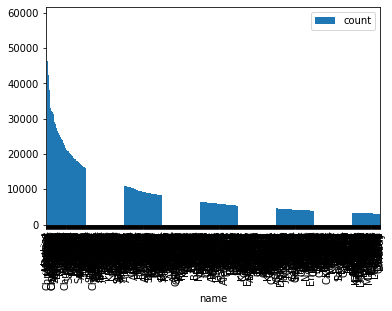

In [62]:
# visualizamos el ejemplo anterior
%matplotlib inline
df.plot(kind='bar',
        x='name',
        y='count')

***


In [73]:
# Test
# Perform a query natality

sql = """
    SELECT
        source_year AS year,
        COUNT(is_male) AS birth_count
    FROM `bigquery-public-data.samples.natality`
    GROUP BY year
    ORDER BY year DESC
    LIMIT 15
"""
query_job = client.query(sql)  # API request
df = client.query(sql).to_dataframe()
df

,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907
5,2003,4096092
6,2002,4027376
7,2001,4031531
8,2000,4063823
9,1999,3963465


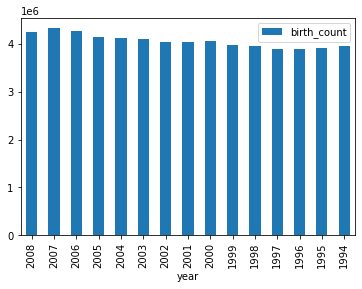

In [74]:
df.plot(kind='bar', x='year', y='birth_count');

***


In [75]:
# Test
# Perform a query natality

sql = """
    SELECT
        wday,
        SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births,
        SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births
    FROM `bigquery-public-data.samples.natality`
    WHERE wday IS NOT NULL
    GROUP BY wday
    ORDER BY wday ASC
"""
query_job = client.query(sql)  # API request
df = client.query(sql).to_dataframe()
df

,wday,male_births,female_births
0,1,4293575,4093357
1,2,6095840,5831111
2,3,6727217,6412155
3,4,6618729,6307782
4,5,6583015,6284434
5,6,6518636,6223584
6,7,4761950,4530052


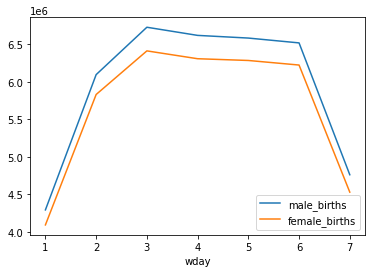

In [76]:
df.plot(x='wday')

****


In [77]:
# test
sql = """
SELECT
    plurality,
    COUNT(1) AS count,
    year
FROM
    `bigquery-public-data.samples.natality`
WHERE
    NOT IS_NAN(plurality) AND plurality > 1
GROUP BY
    plurality, year
ORDER BY
    count DESC
"""
df = client.query(sql).to_dataframe()
df.head()

,plurality,count,year
0,2,139209,2007
1,2,138866,2008
2,2,137239,2006
3,2,133285,2005
4,2,132344,2004


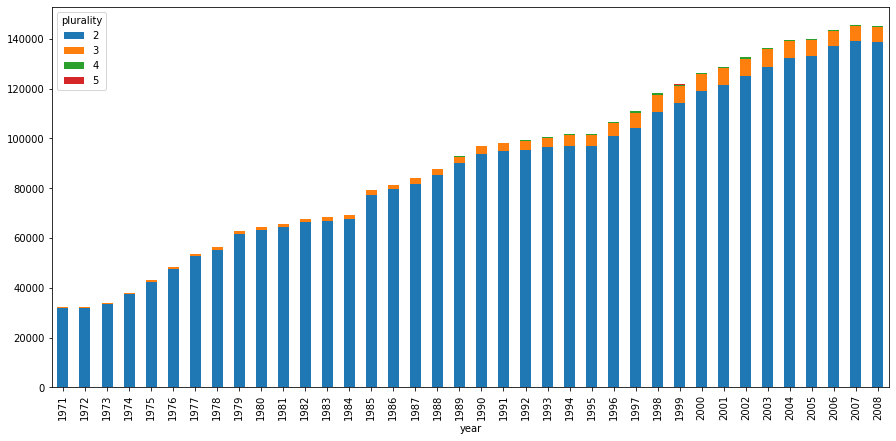

In [78]:
pivot_table = df.pivot(index='year', columns='plurality', values='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 7));

In [79]:
sql = """
SELECT
    gestation_weeks,
    COUNT(1) AS count
FROM
    `bigquery-public-data.samples.natality`
WHERE
    NOT IS_NAN(gestation_weeks) AND gestation_weeks <> 99
GROUP BY
    gestation_weeks
ORDER BY
    gestation_weeks
"""
df = client.query(sql).to_dataframe()

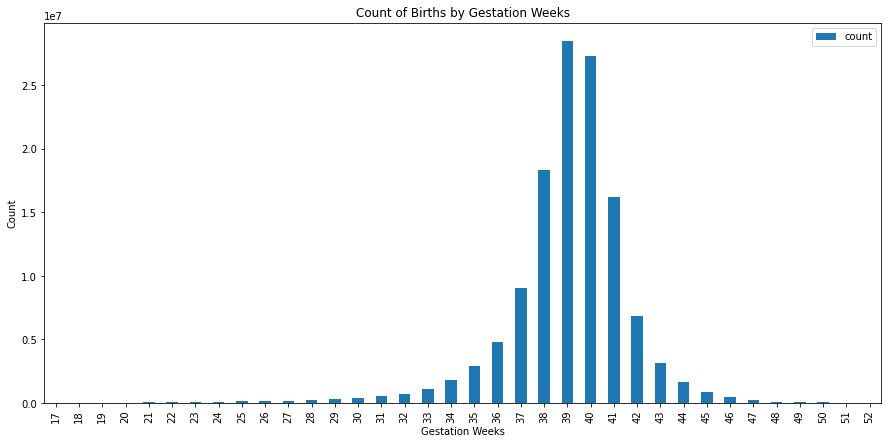

In [80]:
ax = df.plot(kind='bar', x='gestation_weeks', y='count', figsize=(15,7))
ax.set_title('Count of Births by Gestation Weeks')
ax.set_xlabel('Gestation Weeks')
ax.set_ylabel('Count');